# Цель

* Разработать структуру сети, обучаемой по методу коррекции ошибки, которая сможет распознавать буквы и цифры;
* Написать программу, моделирующую разработанную сеть.
* Подготовить два обучающих множества: первое – с одиночными эталонными образами для каждого класса, второе – с различающимися образами, относящимися к одному классу.
* Для первого и второго обучающих множеств провести обучение и распознавание образов, не входящих в обучающие множества. Зафиксировать число циклов обучения при разных искажениях. 
* Определить – требуется ли для каждого из обучающих множеств нейрон смещения

# Результаты проекта

 На каждом рисунке показываются 4 модели: 1 и 2 – модели с одиночными эталонными образами для каждого класса в обучающем множестве, 3 и 4 – с различающимися образами.

## Тестирование модели на тестовых примерах

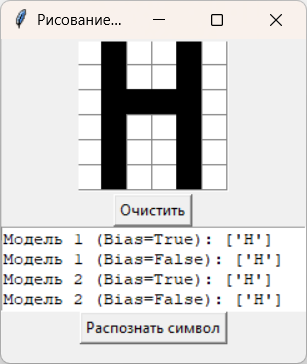
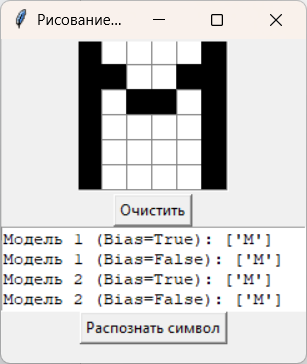
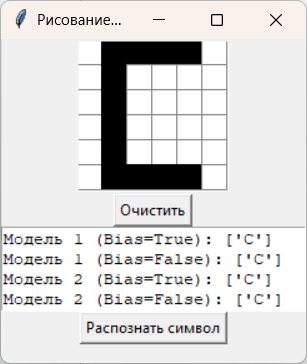
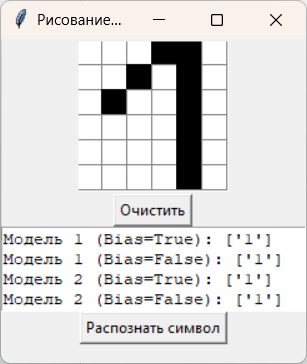
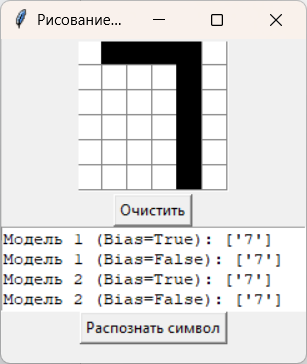

## Тестирование модели на примерах, отличающихся от тестовых

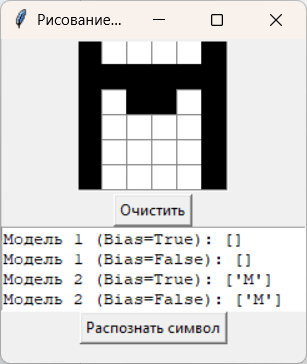
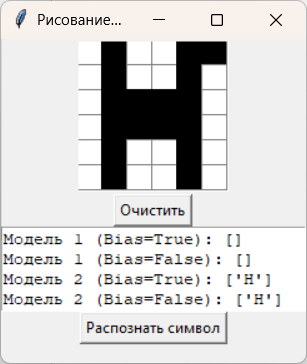
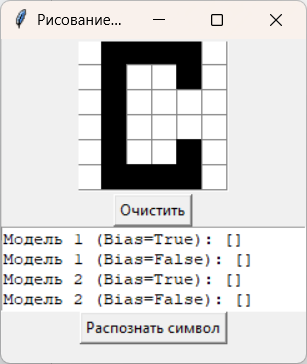
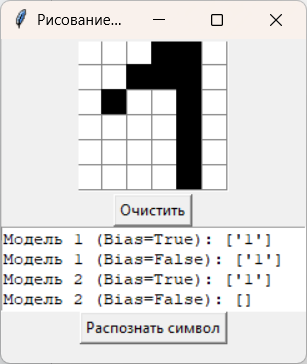
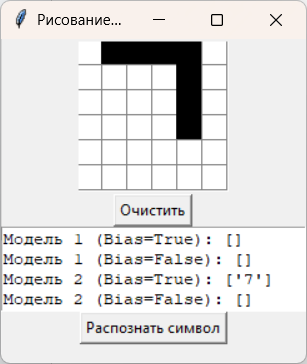

Как видно из рисунков лучше всего себя показывает модель 2 - с различными эталонными образами для каждого класса в обучающем множестве и с включенным нейроном смещения.

# Проектирование однослойной нейронной сети (НС)

## Определение входных и выходных данных

### Вид входных данных

Входной вектор представлен размерностью в 41 значение (Русский алфавит, не включая буквы “ь” и ”ъ”, а также цифры 0-9).

Каждый символ представлен двумерным массивом пикселей 6 на 6. 

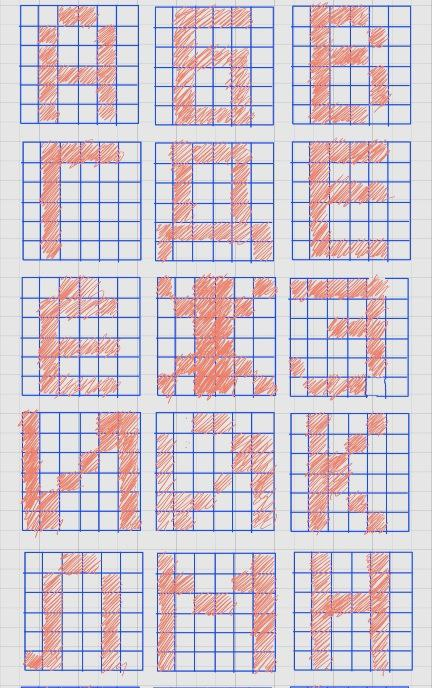
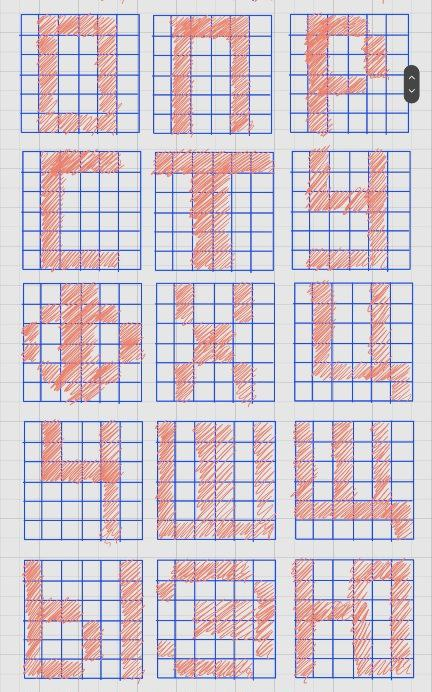
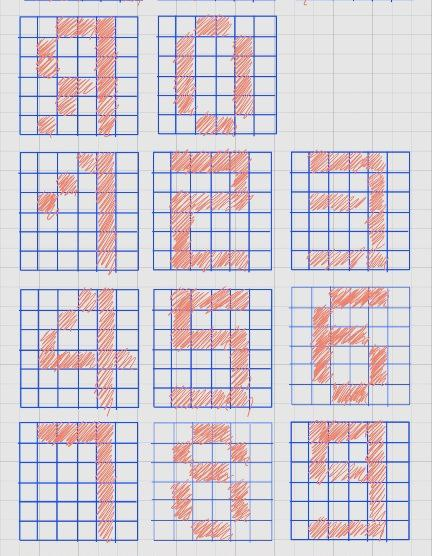

В коде данный датасет представлен в виде словаря, где ключи - символы, а значения - набор пикселей данного символа.

Словарь `letters` - с одиночными эталонными образами для каждого класса;

Словарь `letters2` - c различающимися образами для каждого класса.

In [2]:
letters = {
          "A" : [[0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0]],

          "Б" : [[0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0]],

          "В" : [[0,1,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,0,0]],

          "Г" : [[0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0]],

          "Д" : [[0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [1,1,1,1,1,1],
                 [1,0,0,0,0,1]],

          "Е" : [[0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0]],

          "Ё" : [[0,0,1,1,0,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0]],

          "Ж" : [[1,0,1,1,0,1],
                 [0,1,1,1,1,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0],
                 [0,1,1,1,1,0],
                 [1,0,1,1,0,1]],

          "З" : [[1,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,1,1,1,0],
                 [0,0,0,0,1,0],
                 [1,0,0,0,1,0],
                 [0,1,1,1,0,0]],

          "И" : [[1,0,0,0,1,1],
                 [1,0,0,0,1,1],
                 [1,0,0,1,0,1],
                 [1,0,1,0,0,1],
                 [1,1,0,0,0,1],
                 [1,1,0,0,0,1]],

          "Й" : [[0,0,1,1,0,0],
                 [1,0,0,0,1,1],
                 [1,0,0,0,1,1],
                 [1,0,0,1,0,1],
                 [1,1,1,0,0,1],
                 [1,1,0,0,0,1]],

          "К" : [[0,1,0,0,1,0],
                 [0,1,0,1,0,0],
                 [0,1,1,0,0,0],
                 [0,1,1,0,0,0],
                 [0,1,0,1,0,0],
                 [0,1,0,0,1,0]],

          "Л" : [[0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [1,1,0,0,1,0]],

          "М" : [[1,0,0,0,0,1],
                 [1,1,0,0,1,1],
                 [1,0,1,1,0,1],
                 [1,0,0,0,0,1],
                 [1,0,0,0,0,1],
                 [1,0,0,0,0,1]],

          "Н" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0]],

          "О" : [[0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0]],

          "П" : [[0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0]],

          "Р" : [[0,1,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0]],

          "С" : [[0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0]],

          "Т" : [[1,1,1,1,1,1],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0]],

          "У" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,1,0]],

          "Ф" : [[0,0,1,1,0,0],
                 [0,1,1,1,1,0],
                 [1,0,1,1,0,1],
                 [1,0,1,1,0,1],
                 [0,1,1,1,1,0],
                 [0,0,1,1,0,0]],

          "Х" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0]],

          "Ц" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,1],
                 [0,0,0,0,0,1]],

          "Ч" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0]],

          "Ш" : [[1,0,1,1,0,1],
                 [1,0,1,1,0,1],
                 [1,0,1,1,0,1],
                 [1,0,1,1,0,1],
                 [1,0,1,1,0,1],
                 [1,1,1,1,1,1]],

          "Щ" : [[1,0,1,0,1,0],
                 [1,0,1,0,1,0],
                 [1,0,1,0,1,0],
                 [1,0,1,0,1,0],
                 [1,1,1,1,1,1],
                 [0,0,0,0,0,1]],

          "Ы" : [[1,0,0,0,0,1],
                 [1,0,0,0,0,1],
                 [1,1,1,0,0,1],
                 [1,0,0,1,0,1],
                 [1,0,0,1,0,1],
                 [1,1,1,0,0,1]],

          "Э" : [[0,1,1,1,1,0],
                 [1,0,0,0,0,1],
                 [0,0,1,1,1,1],
                 [0,0,1,1,1,1],
                 [1,0,0,0,0,1],
                 [0,1,1,1,1,0]],

          "Ю" : [[1,0,0,1,1,1],
                 [1,0,0,1,0,1],
                 [1,1,1,1,0,1],
                 [1,0,0,1,0,1],
                 [1,0,0,1,0,1],
                 [1,0,0,1,1,1]],

          "Я" : [[0,0,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,1,0],
                 [0,0,1,0,1,0],
                 [0,1,0,0,1,0]],

          "0" : [[0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,0,0]],

          "1" : [[0,0,0,1,1,0],
                 [0,0,1,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0]],

          "2" : [[0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0]],

          "3" : [[0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,1,0]],

          "4" : [[0,0,0,1,1,0],
                 [0,0,1,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,1],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0]],

          "5" : [[0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,1,0]],

          "6" : [[0,0,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,0,0]],

          "7" : [[0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0]],

          "8" : [[0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,0,0]],

          "9" : [[0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,1,0]]
}

letters2 = {
          "A" : [[0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0]],

          "A1" : [[0,1,1,1,1,0],
                  [0,1,0,0,1,0],
                  [0,1,0,0,1,0],
                  [0,1,1,1,1,0],
                  [0,1,0,0,1,0],
                  [0,1,0,0,1,0]],

          "A2" : [[0,0,1,1,0,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,1,0]],

          "Б" : [[0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0]],

          "Б1" : [[0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0]],

          "В" : [[0,1,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,0,0]],

         "В1" :  [[0,1,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0]],

          "Г" : [[0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0]],

          "Г1" : [[0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0]],

          "Д" : [[0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [1,1,1,1,1,1],
                 [1,0,0,0,0,1]],

          "Д1" : [[0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [1,1,1,1,1,1]],

          "Е" : [[0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0]],

          "Е1" : [[0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0]],

          "Е2" : [[0,1,1,1,0,0],
                 [0,1,0,0,0,0],
                 [0,1,1,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,0,0]],

          "Ё" : [[0,0,1,1,0,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0]],

          "Ж" : [[1,0,1,1,0,1],
                 [0,1,1,1,1,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0],
                 [0,1,1,1,1,0],
                 [1,0,1,1,0,1]],

          "Ж1" : [[1,0,1,1,0,1],
                 [1,0,1,1,0,1],
                 [0,1,1,1,1,0],
                 [0,1,1,1,1,0],
                 [1,0,1,1,0,1],
                 [1,0,1,1,0,1]],

          "З" : [[1,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,1,1,1,0],
                 [0,0,0,0,1,0],
                 [1,0,0,0,1,0],
                 [0,1,1,1,0,0]],

          "И" : [[1,0,0,0,1,1],
                 [1,0,0,0,1,1],
                 [1,0,0,1,0,1],
                 [1,0,1,0,0,1],
                 [1,1,0,0,0,1],
                 [1,1,0,0,0,1]],

          "И1" : [[1,0,0,0,0,1],
                 [1,0,0,0,1,1],
                 [1,0,0,1,0,1],
                 [1,0,1,0,0,1],
                 [1,1,0,0,0,1],
                 [1,0,0,0,0,1]],

          "Й" : [[0,0,1,1,0,0],
                 [1,0,0,0,1,1],
                 [1,0,0,0,1,1],
                 [1,0,0,1,0,1],
                 [1,1,1,0,0,1],
                 [1,1,0,0,0,1]],

          "К" : [[0,1,0,0,1,0],
                 [0,1,0,1,0,0],
                 [0,1,1,0,0,0],
                 [0,1,1,0,0,0],
                 [0,1,0,1,0,0],
                 [0,1,0,0,1,0]],

          "К1" : [[0,1,0,0,0,1],
                 [0,1,0,0,1,0],
                 [0,1,1,1,0,0],
                 [0,1,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,0,1]],

          "К2" : [[0,1,0,0,1,0],
                 [0,1,0,1,1,0],
                 [0,1,1,1,0,0],
                 [0,1,1,1,0,0],
                 [0,1,0,1,1,0],
                 [0,1,0,0,1,0]],

          "Л" : [[0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [1,1,0,0,1,0]],

          "Л1" : [[0,0,1,1,1,0],
                  [0,1,0,0,1,0],
                  [0,1,0,0,1,0],
                  [0,1,0,0,1,0],
                  [0,1,0,0,1,0],
                  [1,1,0,0,1,0]],

          "Л2" : [[0,1,1,1,1,0],
                  [0,1,0,0,1,0],
                  [0,1,0,0,1,0],
                  [0,1,0,0,1,0],
                  [0,1,0,0,1,0],
                  [1,1,0,0,1,0]],

          "М" : [[1,0,0,0,0,1],
                 [1,1,0,0,1,1],
                 [1,0,1,1,0,1],
                 [1,0,0,0,0,1],
                 [1,0,0,0,0,1],
                 [1,0,0,0,0,1]],

          "М1" : [[1,0,0,0,0,1],
                 [1,1,0,0,1,1],
                 [1,1,0,0,1,1],
                 [1,0,1,1,0,1],
                 [1,0,0,0,0,1],
                 [1,0,0,0,0,1]],

          "М2" : [[1,1,0,0,1,1],
                 [1,1,0,0,1,1],
                 [1,1,1,1,1,1],
                 [1,0,1,1,0,1],
                 [1,0,0,0,0,1],
                 [1,0,0,0,0,1]],

          "Н" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0]],

          "Н1" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0]],

          "Н2" : [[1,0,0,0,0,1],
                 [1,0,0,0,0,1],
                 [1,1,1,1,1,1],
                 [1,0,0,0,0,1],
                 [1,0,0,0,0,1],
                 [1,0,0,0,0,1]],

          "О" : [[0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0]],

          "П" : [[0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0]],

          "П1" : [[1,1,1,1,1,1],
                  [1,0,0,0,0,1],
                  [1,0,0,0,0,1],
                  [1,0,0,0,0,1],
                  [1,0,0,0,0,1],
                  [1,0,0,0,0,1]],

          "Р" : [[0,1,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0]],

          "Р1" : [[0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0]],

          "Р2" : [[0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0]],

          "С" : [[0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0]],

          "С1" : [[0,0,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,0,1,1,1,0]],

          "Т" : [[1,1,1,1,1,1],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0]],

          "Т1" : [[1,1,1,1,1,1],
                 [1,0,1,1,0,1],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0]],
                 
          "У" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,1,0]],

          "У1" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,1,0]],

          "У2" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,0,0]],

          "Ф" : [[0,0,1,1,0,0],
                 [0,1,1,1,1,0],
                 [1,0,1,1,0,1],
                 [1,0,1,1,0,1],
                 [0,1,1,1,1,0],
                 [0,0,1,1,0,0]],

          "Ф1" : [[0,0,1,1,0,0],
                 [1,1,1,1,1,1],
                 [1,0,1,1,0,1],
                 [1,0,1,1,0,1],
                 [1,1,1,1,1,1],
                 [0,0,1,1,0,0]],

          "Ф2" : [[0,0,1,1,0,0],
                 [1,1,1,1,1,1],
                 [1,0,1,1,0,1],
                 [1,1,1,1,1,1],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0]],

          "Х" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0]],

          "Х1" : [[1,1,0,0,1,1],
                 [0,1,0,0,1,0],
                 [0,0,1,1,0,0],
                 [0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [1,1,0,0,1,1]],

          "Ц" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,1],
                 [0,0,0,0,0,1]],

          "Ч" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0]],

          "Ч1" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0]],

          "Ч2" : [[0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0]],

          "Ш" : [[1,0,1,1,0,1],
                 [1,0,1,1,0,1],
                 [1,0,1,1,0,1],
                 [1,0,1,1,0,1],
                 [1,0,1,1,0,1],
                 [1,1,1,1,1,1]],

          "Щ" : [[1,0,1,0,1,0],
                 [1,0,1,0,1,0],
                 [1,0,1,0,1,0],
                 [1,0,1,0,1,0],
                 [1,1,1,1,1,1],
                 [0,0,0,0,0,1]],

          "Ы" : [[1,0,0,0,0,1],
                 [1,0,0,0,0,1],
                 [1,1,1,0,0,1],
                 [1,0,0,1,0,1],
                 [1,0,0,1,0,1],
                 [1,1,1,0,0,1]],

          "Ы1" : [[1,0,0,0,0,1],
                 [1,0,0,0,0,1],
                 [1,1,1,1,0,1],
                 [1,0,0,1,0,1],
                 [1,0,0,1,0,1],
                 [1,1,1,1,0,1]],

          "Ы2" : [[1,0,0,0,0,1],
                 [1,0,0,0,0,1],
                 [1,0,0,0,0,1],
                 [1,1,1,0,0,1],
                 [1,0,0,1,0,1],
                 [1,1,1,0,0,1]],

          "Ы3" : [[1,0,0,0,0,1],
                 [1,0,0,0,0,1],
                 [1,0,0,0,0,1],
                 [1,1,1,1,0,1],
                 [1,0,0,1,0,1],
                 [1,1,1,1,0,1]],

          "Э" : [[0,1,1,1,1,0],
                 [1,0,0,0,0,1],
                 [0,0,1,1,1,1],
                 [0,0,1,1,1,1],
                 [1,0,0,0,0,1],
                 [0,1,1,1,1,0]],

          "Э1" : [[1,1,1,1,1,0],
                 [1,0,0,0,0,1],
                 [0,0,1,1,1,1],
                 [0,0,1,1,1,1],
                 [1,0,0,0,0,1],
                 [1,1,1,1,1,0]],

          "Э2" : [[0,0,1,1,1,0],
                 [0,1,0,0,0,1],
                 [0,0,0,1,1,1],
                 [0,0,0,1,1,1],
                 [0,1,0,0,0,1],
                 [0,0,1,1,1,0]],

          "Ю" : [[1,0,0,1,1,1],
                 [1,0,0,1,0,1],
                 [1,1,1,1,0,1],
                 [1,0,0,1,0,1],
                 [1,0,0,1,0,1],
                 [1,0,0,1,1,1]],

          "Ю1" : [[1,0,0,0,1,0],
                 [1,0,0,1,0,1],
                 [1,1,1,1,0,1],
                 [1,0,0,1,0,1],
                 [1,0,0,1,0,1],
                 [1,0,0,0,1,0]],

          "Я" : [[0,0,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,1,0],
                 [0,0,1,0,1,0],
                 [0,1,0,0,1,0]],

          "Я1" : [[0,0,1,1,1,0],
                  [0,1,0,0,1,0],
                  [0,1,0,0,1,0],
                  [0,0,1,1,1,0],
                  [0,1,0,0,1,0],
                  [0,1,0,0,1,0]],

          "0" : [[0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,0,0]],

          "1" : [[0,0,0,1,1,0],
                 [0,0,1,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0]],

          "1_1" : [[0,0,0,0,1,0],
                   [0,0,0,0,1,0],
                   [0,0,0,0,1,0],
                   [0,0,0,0,1,0],
                   [0,0,0,0,1,0],
                   [0,0,0,0,1,0]],

          "2" : [[0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0]],

          "2_1" : [[0,1,1,1,1,0],
                  [0,0,0,0,1,0],
                  [0,0,0,0,1,0],
                  [0,1,1,1,1,0],
                  [0,1,0,0,0,0],
                  [0,1,1,1,1,0]],

          "2_2" : [[0,1,1,1,0,0],
                  [0,0,0,0,1,0],
                  [0,0,1,1,0,0],
                  [0,1,0,0,0,0],
                  [0,1,0,0,0,0],
                  [0,1,1,1,1,0]],

          "3" : [[0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,1,0]],

          "3_1" : [[0,1,1,1,1,0],
                  [0,0,0,0,1,0],
                  [0,0,1,1,1,0],
                  [0,0,0,0,1,0],
                  [0,0,0,0,1,0],
                  [0,1,1,1,1,0]],

          "4" : [[0,0,0,1,1,0],
                 [0,0,1,0,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,1],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0]],

          "5" : [[0,1,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,1,0]],

          "5_1" : [[0,1,1,1,1,0],
                   [0,1,0,0,0,0],
                   [0,1,1,1,0,0],
                   [0,0,0,0,1,0],
                   [0,0,0,0,1,0],
                   [0,1,1,1,0,0]],

          "5_2" : [[0,1,1,1,1,0],
                   [0,1,0,0,0,0],
                   [0,0,1,1,0,0],
                   [0,0,0,0,1,0],
                   [0,0,0,0,1,0],
                   [0,1,1,1,0,0]],

          "6" : [[0,0,1,1,1,0],
                 [0,1,0,0,0,0],
                 [0,1,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,0,0]],

          "6_1" : [[0,0,1,1,1,0],
                   [0,1,0,0,0,0],
                   [0,1,0,0,0,0],
                   [0,1,1,1,0,0],
                   [0,1,0,0,1,0],
                   [0,0,1,1,0,0]],

          "7" : [[0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0]],

          "7_1" : [[0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0]],

          "7_2" : [[0,1,1,1,1,0],
                   [0,0,0,0,1,0],
                   [0,0,0,0,1,0],
                   [0,0,0,1,1,1],
                   [0,0,0,0,1,0],
                   [0,0,0,0,1,0]],

          "8" : [[0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,1,0,0,1,0],
                 [0,0,1,1,0,0]],

          "9" : [[0,1,1,1,1,0],
                 [0,1,0,0,1,0],
                 [0,1,1,1,1,0],
                 [0,0,0,0,1,0],
                 [0,0,0,0,1,0],
                 [0,1,1,1,1,0]],

          "9_1" : [[0,0,1,1,0,0],
                   [0,1,0,0,1,0],
                   [0,1,0,0,1,0],
                   [0,0,1,1,1,0],
                   [0,0,0,0,1,0],
                   [0,1,1,1,0,0]],

          "9_2" : [[0,1,1,1,1,0],
                   [0,1,0,0,1,0],
                   [0,1,0,0,1,0],
                   [0,1,1,1,1,0],
                   [0,0,0,0,1,0],
                   [0,1,1,1,1,0]],
}

### Вид выходных данных

Выходные данные также представлены в виде словаря, где ключи - буквы, а значения - вектора выходов нейронов. 

Данные вектора представлены в виде One Hot Encoding.

Словарь `val_values` - выходные данные для модели с одиночными эталонными образами для каждого класса;

Словарь `val_values2` - выходные данные для модели с различающимися образами для каждого класса.

In [3]:
val_values = {
  "А" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
  "Б" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
  "В" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
  "Г" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
  "Д" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
  "Е" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
  "Ё" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
  "Ж" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
  "З" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
  "И" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
  "Й" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
  "К" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
  "Л" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
  "М" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "Н" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "О" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "П" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "Р" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "С" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "Т" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "У" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "Ф" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "Х" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "Ц" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "Ч" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "Ш" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "Щ" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "Ы" : [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "Э" : [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "Ю" : [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "Я" : [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "0" : [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "1" : [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "2" : [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "3" : [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "4" : [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "5" : [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "6" : [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "7" : [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "8" : [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  "9" : [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
}

val_values2 = {
"А" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
"А1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
"А2": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
"Б" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
"Б1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
"В" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
"В1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
"Г" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
"Г1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
"Д" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
"Д1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
"Е" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
"Е1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
"Е2": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
"Ё" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
"Ж" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
"Ж1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
"З" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
"И" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
"И1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
"Й" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
"К" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
"К1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
"К2": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
"Л" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
"Л1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
"Л2": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
"М" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
"М1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
"М2": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Н" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Н1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Н2": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"О" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"П" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"П1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Р" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Р1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Р2": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"С" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"С1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Т" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Т1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"У" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"У1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"У2": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ф" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ф1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ф2": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Х" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Х1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ц" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ч" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ч1": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ч2": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ш" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Щ" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ы" : [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ы1": [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ы2": [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ы3": [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Э" : [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Э1": [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Э2": [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ю" : [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Ю1": [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Я" : [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"Я1": [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"0" : [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"1" : [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"1_1": [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"2"  : [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"2_1": [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"2_2": [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"3"  : [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"3_1": [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"4"  : [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"5"  : [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"5_1": [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"5_2": [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"6"  : [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"6_1": [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"7"  : [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"7_1": [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"7_2": [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"8"  : [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"9"  : [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"9_1": [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
"9_2": [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
}

## Архитектура НС

Данная нейросеть представляет собой однослойный перцептрон, использующий матричные операции, функцию коррекции ошибки и бинарную функцию активации.

Нейросеть может включать нейрон смещения (bias), что позволяет скорректировать порог активации.

Основная идея метода заключается в усилении связей, соединяющих нейроны с одинаковой активностью, и ослабления связей, соединяющих нейроны с различной активностью. Если множество обучающих образов достаточно разнообразно, то в результате обучения нейронная сеть может с высокой надежностью распознавать образы, отличающиеся в какой-то степени от эталонов.

In [1]:
import tkinter as tk
import numpy as np
import time

### Класс для инициализации НС и ее основных функций - обучение, предсказание

#### Вычисление весовых коэффициентов

Матрица весовых коэффициентов инициализируется нулевыми значениями. Формирование матрицы весов зависит от наличия нейрона смещения:
* Если bias включен, размерность матрицы $ (val \times (p+1)) $, где $ p $ — количество пикселей в изображении, $ val $ - количество распознаваемых образов в датасете. 
* Если bias выключен, размерность матрицы $ (val \times p) $.

Каждый входной вектор (изображение символа) трансформируется в одномерный массив признаков. В случае наличия bias вектор расширяется дополнительным столбцом, содержащим единицы.

#### Метод коррекции ошибки

Инициализация: задается обучающее множество $M = \{(x^{(1)},t^{(1)}), ... , (x^{(m)},t^{(m)})\}$, состоящее из пар: вектор признаков $x^{(k)}$ и требуемый выходной вектор $t^{(k)}, (k = 1,...,m)$. Для $k$-го класса требуемый выходной вектор имеет вид $(t_1=0, ... ,t_k=1, ... , t_m=0)$. Матрица весовых коэффициентов $W$ обнуляется.

Коррекция весов: для каждой $k$-ой пары из множества $M$ входной вектор $x^{(k)}$ подается на вход нейроной сети и проверяется совпадение элементов выходного $y$ и требуемого $t^{(k)}$ векторов. Если они отличаются, то элементы матрицы весовых коэффициентов $W^{(l-1)}$ корректируются ($l -$ номер коррекции) по правилу:

$$ w_ij^{(l)} = w_ij^{(l-1)} + (t_j - y_j)x_i $$

Где:
* $ w_ij - $ вес соединения между i-м входом и j-м нейроном;
* $ t_j - $ целевое значение;
* $ y_j - $ предсказанное значение;
* $ x_i - $ входной признак.

Коррекция матрицы $W$ выполняется только для тех $j$-x столбцов, в которых $y_i \ne t_i$, т.е. изменяются весовые коэффициенты только у ошибающихая нейронов.

Для каждого входного вектора вычисляется взвешенная сумма входов:

$$ S = \sum_{i=0}^n w_ix_i $$

Затем применяется бинарная функция активации с порогом $ \theta $:

$$ y = \begin{cases} 1, если S \geq \theta \\ 0, если S < \theta \end{cases} $$

Пороговое значение $ \theta $ настраивается. Если используется смещение, то он корректирует порог срабатывания нейрона.

Обучение продолжается до тех пор, пока ошибка $ t_j - y_j $ не станет нулевой для всех образов.

#### Процесс обучения

1. Инициализация весов нулями.
2. Преобразование входных данных в вектор признаков.
3. Вычисление уровня возбуждения $ S $.
4. Применение функции активации.
5. Вычисление ошибки $ t_j - y_j $ и корректировка весов.
6. Повторение до достижения нулевой ошибки.

#### Процесс распознавания

1. Входные признаки преобразуются в вектор.
2. Вычисляется уровень возбуждения нейронов.
3. Применяется функция активации.
4. Определяется класс символа по выходному вектору.

In [4]:
class Neuro():

  def __init__(self, bias=True):
    """
    Инициализация нейросети.
    
    Параметры:
    bias (bool): Использовать ли нейрон смещения.
    """
    self.bias = bias     #Нейрон смещения
    self.W_trained = []  #Хранение весовых коэффициентов 
    self.val_list = []   #Хранение размеченнных классов в виде списка
    self.pred_class = {}

  def weight_coefs(self, dict_class, dict_val):
    """
    Создание матрицы весовых коэффициентов W0 с нулевыми значениями.
    
    Параметры:
    dict_class (dict): Словарь с классами и их признаками.
    dict_val (dict): Словарь соответствия классов и значений.
    
    Возвращает:
    np.array: Матрица нулевых весов.
    """

    #Подсчет количества признаков в первом элементе словаря
    p = len(dict_class[next(iter(dict_class))])*len(dict_class[next(iter(dict_class))][0])

    #Если включен нейрон смещения, то возвращаем матрицу коэффициентов в виде (value x p+1)
    #Где value  - количество признаков в классе, p - количество распознаваемых пикселей
    if self.bias:
      return np.zeros(((len([value for value in dict_val.values()][0])), p+1))
    else:
      return np.zeros(((len([value for value in dict_val.values()][0])), p))

  def vectorize_features(self, dictionary):
    """
    Преобразование признаков в вектор.
    
    Параметры:
    dictionary (dict): Словарь с входными данными.
    
    Возвращает:
    np.array: Векторизованный массив признаков.
    """
    V = []
    for value in dictionary.values():
      T = np.concatenate(value)
      V.append(T)
    V = np.array(V)

    if self.bias:
      new_col = np.array([1] * len(V))  # Создаем новый столбец с единицами такой же длины, как и V
      arr_expanded = np.hstack((new_col.reshape(-1, 1), V))  # Добавляем новый столбец в начало V
      return arr_expanded
    else:
      return V

  def activation_func(self, S, theta):
    """
    Бинарная функция активации.
    
    Параметры:
    S (float): Уровень возбуждения нейрона.
    theta (float): Пороговое значение.
    
    Возвращает:
    int: 1, если S >= theta, иначе 0.
    """
    if S >= theta:
      y = 1
    else:
      y = 0
    return y

  def level_of_neuron_excitation(self, weight, features):
    """
    Вычисление уровня возбуждения нейрона(S).
    
    Параметры:
    weight (np.array): Вектор весов.
    features (np.array): Входные признаки.
    
    Возвращает:
    float: Уровень возбуждения.
    """
    return np.dot(weight, features.transpose())

  def all_zeros(self, lst):
    """
    Проверка, содержит ли список только нули.
    """
    return all(element == 0 for element in lst)

  def model_learning(self, features_dict, prediction_dict, show_info=False):
    """
    Обучение модели.
    
    Параметры:
    features_dict (dict): Словарь с признаками.
    prediction_dict (dict): Словарь соответствий классов.
    show_info (bool): Флаг вывода информации.
    """

    #начальньное время выполнения программы
    st = time.time()

    # Создаем новый словарь, чтобы удалить дубликаты для отображения классов
    unique_dict = {}
    for key, value in prediction_dict.items():
      if value not in unique_dict.values():
        unique_dict[key] = value
   
    #Сохраняем словарь классов для вывода 
    self.pred_class = unique_dict

    #Векторизованные признаки
    X = self.vectorize_features(features_dict)

    #Ожидаемые значения в виде массива
    self.val_list = [value for value in prediction_dict.values()]

    #Начальные весовые коэффициенты = 0
    W = self.weight_coefs(features_dict, prediction_dict)

    if show_info: print(f'{"|"} {"I"} {"|"} {"X"} {"|"} {"t":>2} {"|"} {"S":>6} {"|"} {"y":>2} {"|"} {"t-y":>3} {"|"}')
    iter = 0
    while True:
      dev = [] #хранение списка отклонений t-y
      for i, j in enumerate(X):
        if show_info: 
          y_x = []
          print(f"-" * len(f'{"|"} {str(i)} {"|"} {str(i)} {"|"} {str(i):>2} {"|"} {str(11):>6} {"|"} {str(i):>2} {"|"} {str(11):>3} {"|"}'))
        for m in range(len(self.val_list[0])):
          S = self.level_of_neuron_excitation(W[m], j)
          y = self.activation_func(S, W[m][0])
          deviation = self.val_list[i][m] - y
          W[m] += X[i] * deviation
          dev.append(deviation)
          if show_info: 
            y_x.append(y)
            print(f'{"|"} {str(iter)} {"|"} {str(i)} {"|"} {str(self.val_list[i][m]):>2} {"|"} {str(S):>6} {"|"} {str(y):>2} {"|"} {str(deviation):>3} {"|"}')

        #Соотношение распознанного образа с ключом 
        if show_info: 
          keys = [key for key, value in prediction_dict.items() if value == y_x]
          print(f'{str(keys): ^34}')

      if show_info: print(f'{str(iter):_^34}')

      iter += 1

      #Останов цикла, если все t-y = 0
      if self.all_zeros(dev):
        break

    #конечное время
    et = time.time()
    #время выполнения
    elapsed_time = et - st
    print(f'Время обучения: {elapsed_time} секунд; Количество итераций: {iter}')

    #Вычисленные значения весовых коэффициентов
    self.W_trained = W


  def predict(self, features_dict, show_info=False):
    """
    Предсказание модели.
    
    Параметры:
    features_dict (dict): Словарь с входными признаками.
    show_info (bool): Флаг вывода информации.
    
    Возвращает:
    list: Распознанные классы.
    """
        
    #Векторизованные признаки
    X = self.vectorize_features(features_dict)

    W = self.W_trained

    if show_info: print(f'{"|"} {"X"} {"|"} {"S":>6} {"|"} {"y":>2} {"|"}')
    for i, j in enumerate(X):
      y_x = []
      if show_info: print(f"-" * len(f'{"|"} {str(i)} {"|"} {str(11):>6} {"|"} {str(i):>2} {"|"}'))
      for m in range(len(self.val_list[0])):
        S = self.level_of_neuron_excitation(W[m], j)
        y = self.activation_func(S, W[m][0])
        y_x.append(y)
        if show_info: print(f'{"|"} {str(i)} {"|"} {str(S):>6} {"|"} {str(y):>2} {"|"}')

      keys = [key for key, value in self.pred_class.items() if value == y_x]
      return keys

## Приложение для рисования и распознавания символов

Приложение `DrawingApp` предназначено для ввода символов вручную с последующим распознаванием их нейросетевыми моделями.

### Функциональность приложения

* Интерфейс на tkinter, состоящий из холста для рисования, кнопки очистки и текстового окна для отображения предсказанных символов.
* Поддержка четырех моделей (с bias и без bias для двух разных типов моделей).
* Графическое представление рисуемого символа в виде 6x6 сетки.

### Основные методы

* `draw_grid()`: Создает визуальную сетку на холсте.
* `draw(event)`: Реагирует на движение мыши, закрашивая соответствующие ячейки.
* `get_symbol()`: Возвращает нарисованный символ в виде матрицы 6x6.
* `clear_canvas()`: Очищает холст и обновляет сетку.
* `print_symbol()`: Передает нарисованный символ в модели и выводит предсказания.

Метод `print_symbol()` использует четыре модели для предсказания нарисованного символа и выводит результат в текстовом поле:
1. `model.predict()`: Первая модель с bias.
2. `model2.predict()`: Первая модель без bias.
3. `model3.predict()`: Вторая модель с bias.
4. `model4.predict()`: Вторая модель без bias.

Каждая модель принимает входной рисунок в виде словаря `{"UserInput": symbol}` и возвращает распознанный символ.

In [6]:
class DrawingApp:
  
  def __init__(self, master, model, model2=None, model3=None, model4=None):
    """
    Инициализация приложения.
    
    Параметры:
    master (tk.Tk): Основное окно.
    model, model2, model3, model4: Модели для предсказания.
    """
    
    self.master = master
    self.model = model
    self.model2 = model2
    self.model3 = model3
    self.model4 = model4
    self.master.title("Рисование символа")
    self.canvas = tk.Canvas(self.master, width=120, height=120, bg="white")
    self.canvas.pack()
    self.cell_size = 20
    self.grid = [[0] * 6 for _ in range(6)]
    self.draw_grid()
    self.canvas.bind("<B1-Motion>", self.draw)
    # Добавление кнопки "Очистить"
    self.clear_button = tk.Button(self.master, text="Очистить", command=self.clear_canvas)
    self.clear_button.pack()
    # Создание виджета текста
    self.output_text = tk.Text(self.master, height=4, width=30)
    self.output_text.pack()

  def draw_grid(self):
    """
    Рисует сетку на холсте.
    """
    
    for i in range(6):
      for j in range(6):
        x0, y0 = j * self.cell_size, i * self.cell_size
        x1, y1 = x0 + self.cell_size, y0 + self.cell_size
        self.canvas.create_rectangle(x0, y0, x1, y1, outline="gray", fill="white")

  def draw(self, event):
    """
    Закрашивает ячейки при движении мыши.
    """
    
    x, y = event.x, event.y
    col, row = x // self.cell_size, y // self.cell_size
    if 0 <= col < 6 and 0 <= row < 6:
      if self.grid[row][col] == 0:
        self.grid[row][col] = 1
        x0, y0 = col * self.cell_size, row * self.cell_size
        x1, y1 = x0 + self.cell_size, y0 + self.cell_size
        self.canvas.create_rectangle(x0, y0, x1, y1, outline="", fill="black")

  def get_symbol(self):
    """
    Возвращает нарисованный символ в виде матрицы 6x6.
    """
    return self.grid

  def clear_canvas(self):
    """
    Очищает холст.
    """
    
    # Очистка поля от нарисованного символа
    self.grid = [[0] * 6 for _ in range(6)]
    self.canvas.delete("all")  # Удаляем все объекты на холсте
    self.draw_grid()  # Рисуем сетку заново
    
  def print_symbol(self):
    """
    Предсказывает символ с помощью моделей и выводит результаты.
    """
    symbol = self.get_symbol()
    self.output_text.delete(1.0, tk.END)  # Очищаем содержимое виджета текста

    prediction = self.model.predict({"UserInput": symbol}, show_info=False)
    self.output_text.insert(tk.END, f"Модель 1 (Bias=True): {prediction}\n")
    prediction2 = self.model2.predict({"UserInput": symbol}, show_info=False)
    self.output_text.insert(tk.END, f"Модель 1 (Bias=False): {prediction2}\n")

    prediction3 = self.model3.predict({"UserInput": symbol}, show_info=False)
    self.output_text.insert(tk.END, f"Модель 2 (Bias=True): {prediction3}\n")
    prediction4 = self.model4.predict({"UserInput": symbol}, show_info=False)
    self.output_text.insert(tk.END, f"Модель 2 (Bias=False): {prediction4}")

## Основная программа

Функция `main()` выполняет обучение четырех моделей:
1. `model` – обученная на единичных образах с `bias=True`.
2. `model2` – обученная на единичных образах с `bias=False`.
3. `model3` – обученная на множественных образах с `bias=True`.
4. `model4` – обученная на множественных образах с `bias=False`.

После обучения создается графический интерфейс `DrawingApp`, который позволяет пользователю рисовать символ и запускать распознавание с помощью всех четырех моделей.

In [7]:
def main():
  #Обучение модели
  #Модель с единичными образами в классах
  model = Neuro(bias=True)
  model.model_learning(letters, val_values, show_info=False)
  
  model2 = Neuro(bias=False)
  model2.model_learning(letters, val_values, show_info=False)

  #Модель с множественными образами в классах
  model3 = Neuro(bias=True)
  model3.model_learning(letters2, val_values2, show_info=False)
  
  model4 = Neuro(bias=False)
  model4.model_learning(letters2, val_values2, show_info=False)

  #Вывод полной матрицы весов 
  #with np.printoptions(threshold=np.inf):
  #  print(f'W_1_BT: {model.W_trained}')
  #  print(f'W_1_BF: {model2.W_trained}')
  #  print(f'W_2_BT: {model3.W_trained}')
  #  print(f'W_2_BF: {model4.W_trained}')

  #Распознавание символа
  root = tk.Tk()
  app = DrawingApp(root, model, model2, model3, model4)
  button = tk.Button(root, text="Распознать символ", command=app.print_symbol)
  button.pack()
  root.mainloop()

if __name__ == "__main__":
  main()

Время обучения: 0.36164140701293945 секунд; Количество итераций: 38
Время обучения: 0.4183838367462158 секунд; Количество итераций: 42
Время обучения: 2.5267438888549805 секунд; Количество итераций: 113
Время обучения: 2.9837589263916016 секунд; Количество итераций: 139


# Выводы

Время обучения НС составило:
<table>
    <tr>
        <th>Модель</th>
        <th>Время обучения, с</th>
        <th>Количество итераций</th>
    </tr>
    <tr>
        <td>1, bias=True</td>
        <td>0.362</td>
        <td>38</td>
    </tr>
    <tr>
        <td>1, bias= False</td>
        <td>0.418</td>
        <td>42</td>
    </tr>
    <tr>
        <td>2, bias=True</td>
        <td>2.527</td>
        <td>113</td>
    </tr>
    <tr>
        <td>2, bias=False</td>
        <td>2.984</td>
        <td>139</td>
    </tr>
</table>

Как видно из данной таблицы время обучения растет, при добавлении различных образов в каждый класс. Модели с включенным нейроном смещения также обучаются быстрее, и требуют меньшее количество итераций на обучение. 


Анализ матриц весовых коэффициентов показывает необходимость наличия нейрона смещения в НС, поскольку нулевой вектор не обращается в ноль.